In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('powerconsumption.csv')

In [3]:
data = data.dropna()

In [4]:
data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Datetime'])

In [7]:
# Set 'Date' column as the index
data.set_index('Date', inplace=True)

In [8]:
# Resample to daily frequency (if the data is not already daily)
data = data.resample('D').mean()

<ipython-input-8-ad1096eebf25>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('D').mean()


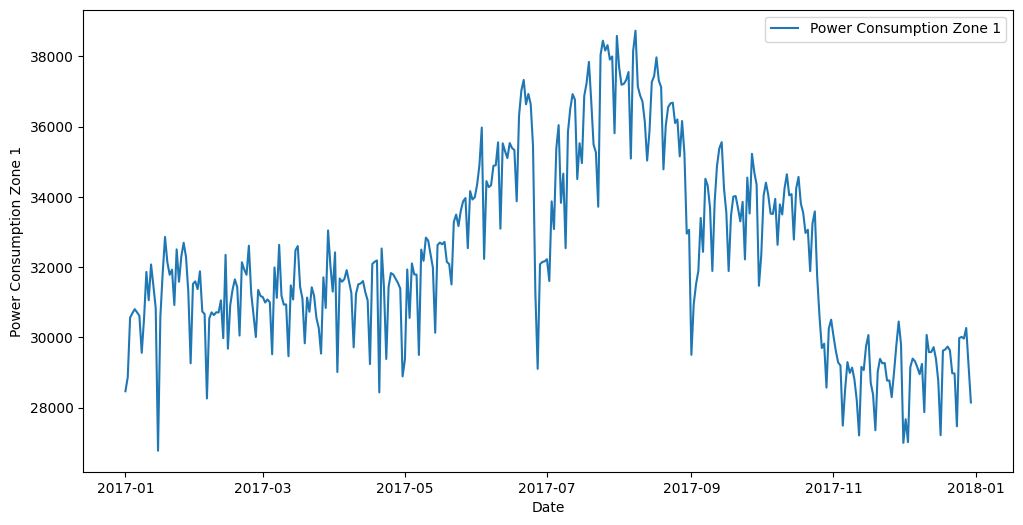

In [9]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PowerConsumption_Zone1'], label='Power Consumption Zone 1')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 1')
plt.legend()
plt.show()


In [10]:
# Step 3: Feature Engineering
data['PowerConsumption_Zone1_Lag7'] = data['PowerConsumption_Zone1'].shift(7)

In [11]:
# Calendar features
data['Day_of_Week'] = data.index.dayofweek
data['Month'] = data.index.month

In [12]:
# Step 4: Splitting Data
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


In [13]:
# Step 5: Model Selection (ARIMA)
p, d, q = 1, 1, 1
model = ARIMA(train_data['PowerConsumption_Zone1'], order=(p, d, q))

In [14]:
# Step 6: Model Training
model_fit = model.fit()

In [15]:
# Step 7: Model Validation
predictions = model_fit.forecast(steps=len(test_data))

In [16]:
# Evaluate model performance (e.g., Mean Absolute Error)
mae = mean_absolute_error(test_data['PowerConsumption_Zone1'], predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4466.387144699745


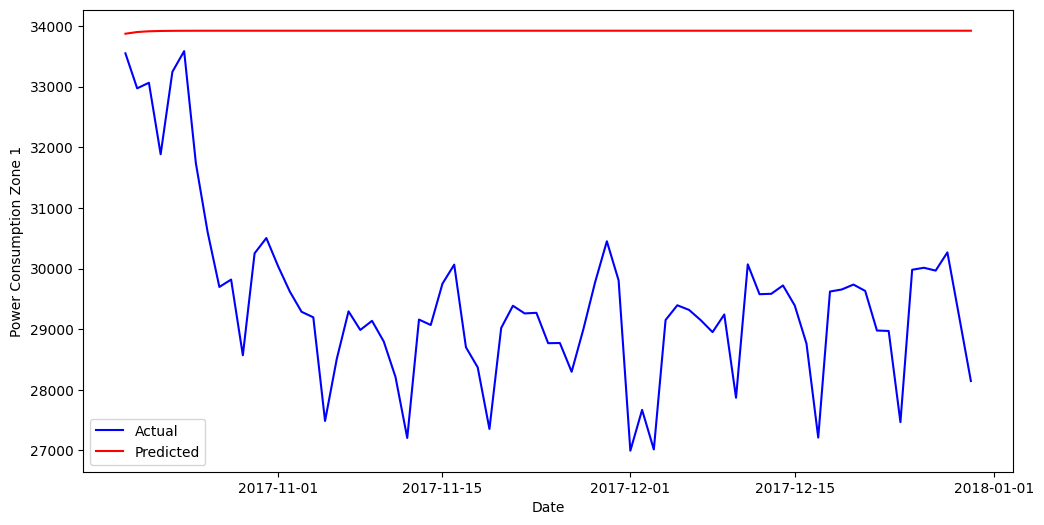

In [17]:
# Visualize the predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['PowerConsumption_Zone1'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 1')
plt.legend()
plt.show()

In [18]:
# Step 8: Future Forecasting
forecast_steps = 30
future_forecast = model_fit.forecast(steps=forecast_steps)


<ipython-input-19-99c916f9348c>:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right'), future_forecast, label='Future Forecast', color='green')


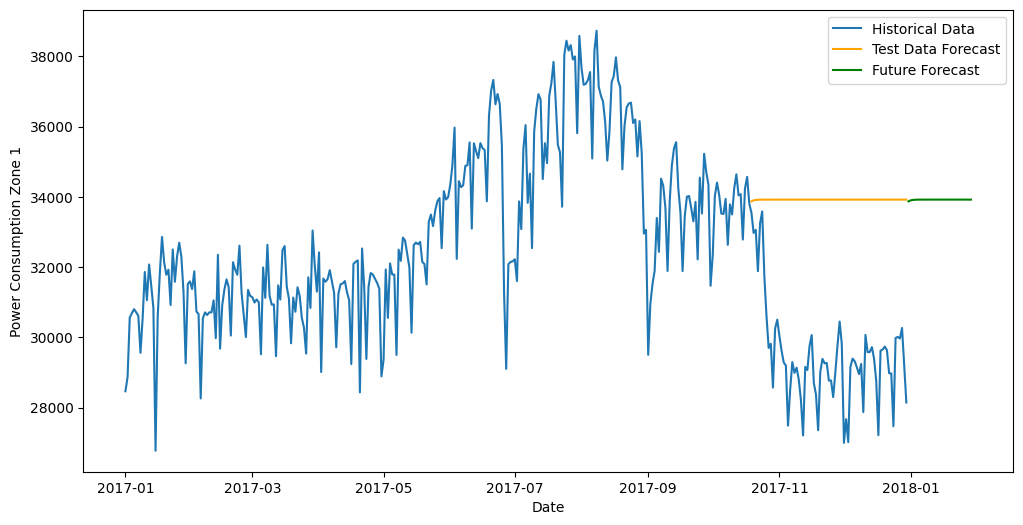

In [19]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PowerConsumption_Zone1'], label='Historical Data')
plt.plot(test_data.index, predictions, label='Test Data Forecast', color='orange')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right'), future_forecast, label='Future Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Power Consumption Zone 1')
plt.legend()
plt.show()
